In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


info function use for checking non-null value, dtype of all columns

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


describe used for mathematics & statistical operation ,for checking skewness.from above table we can see balance is highly skewed & estimated salary is slightly skewed. 

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

isnull function used for checking null value,from above we can see there is no null value present.

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

drop function used for drop unnecessary columns, from above we can see RowNumber,CustomerId,Surname are unnecessary columns so we drop them.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

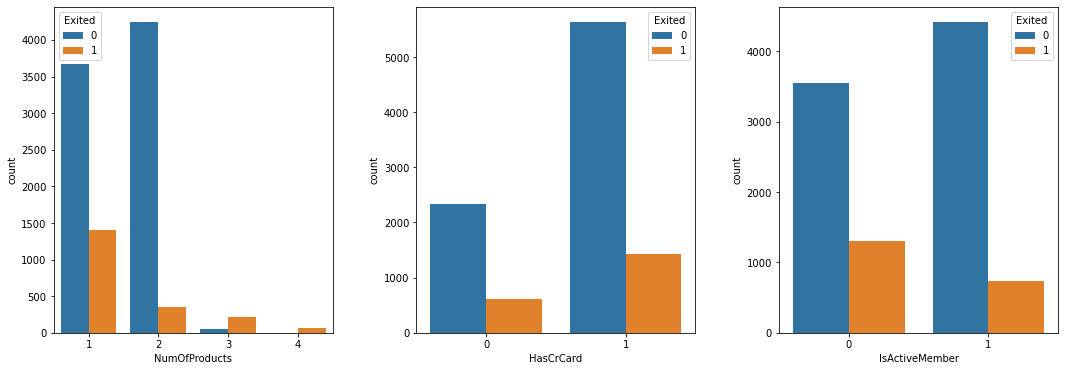

In [10]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2])

from above we count which columns customer are likely to exited,Customer with 3 or 4 products are higher chances to Churn.

In [11]:
# Converting the categorical variables into numerical and avoiding Dummy Varibale Tra
df= pd.get_dummies(df, drop_first=True)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

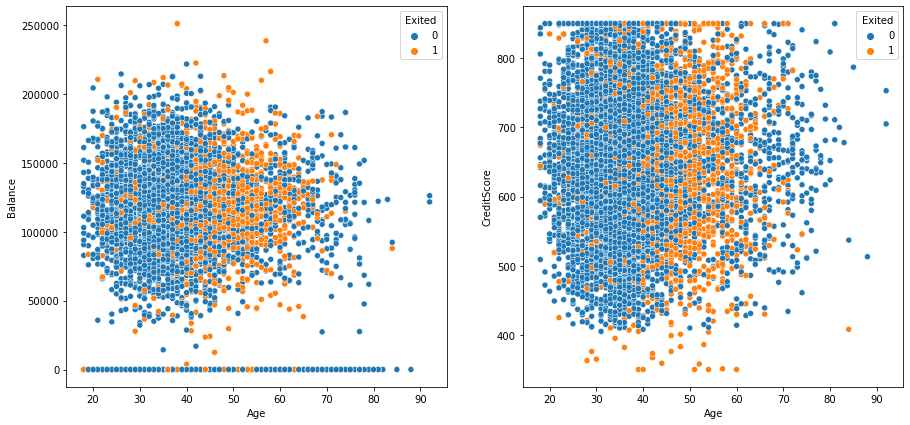

In [13]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[1])

1) 40 to 70 years old customers are higher chances to churn
2) Customer with CreditScore less then 400 are higher chances to churn

In [14]:
#feature & target
X = df.drop("Exited", axis=1)
y = df["Exited"]

<AxesSubplot:>

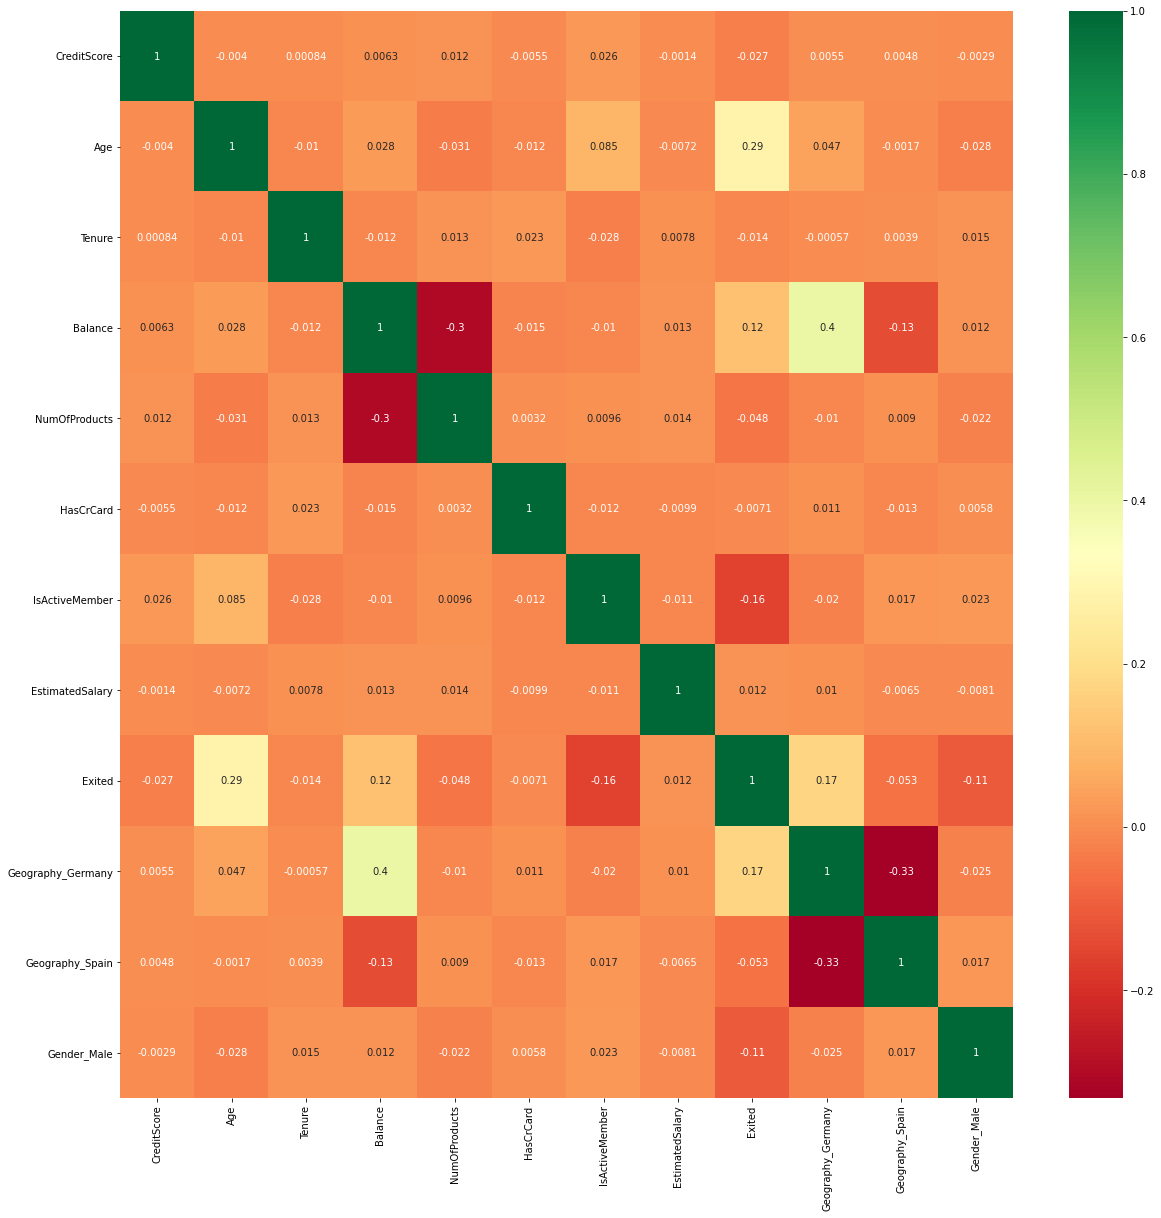

In [15]:
# Plotting The Correlations between all the features
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

from above correlation heat map we can see there is no multi-colinearity between feature & target. 

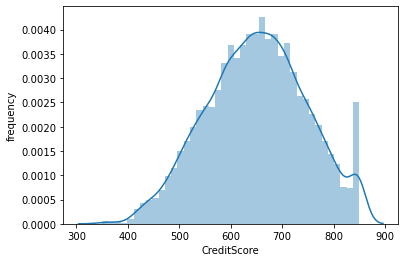

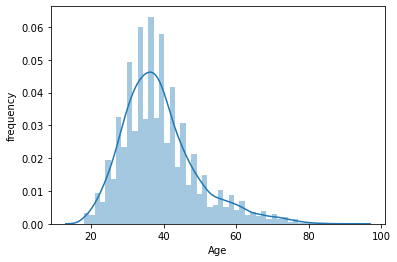

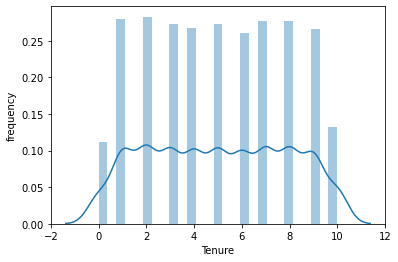

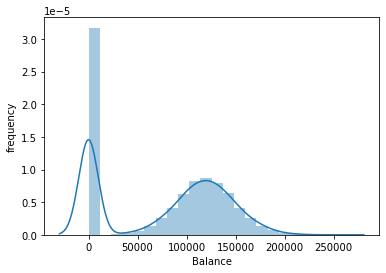

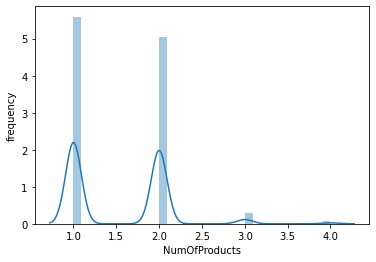

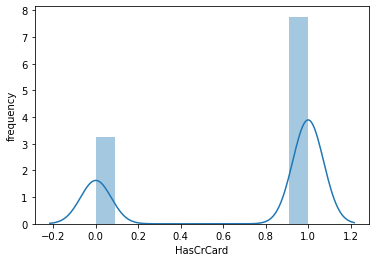

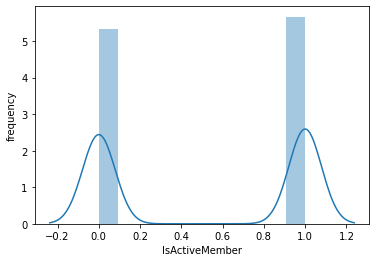

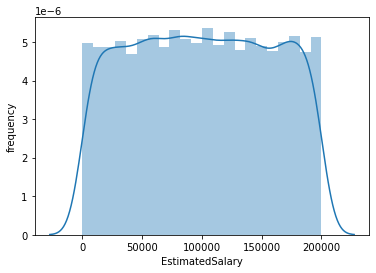

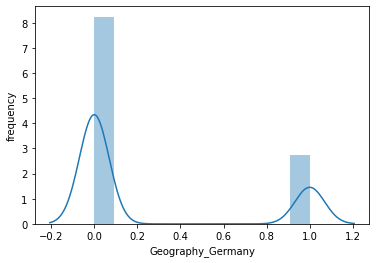

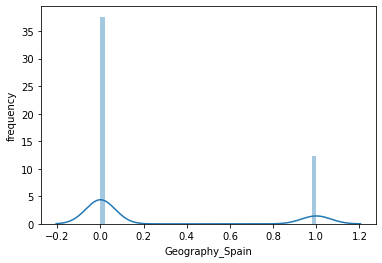

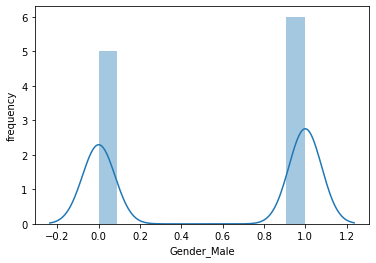

In [16]:
for col in X:
    plt.figure()
    sns.distplot(X[col])
    plt.ylabel("frequency")
    plt.show()

distplot applied for checking skewness, from above we can see age & balance columns are highly skewed.

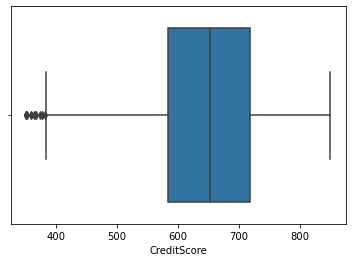

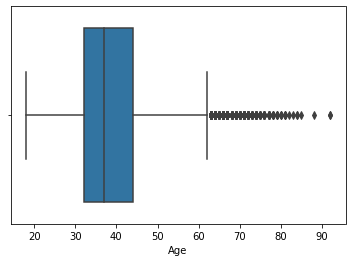

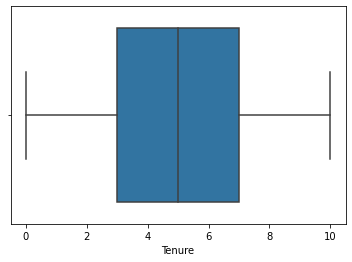

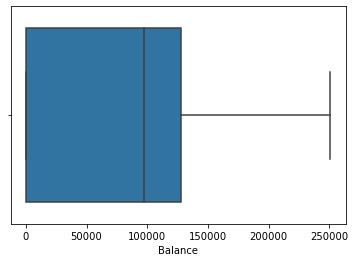

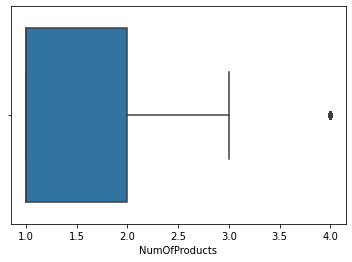

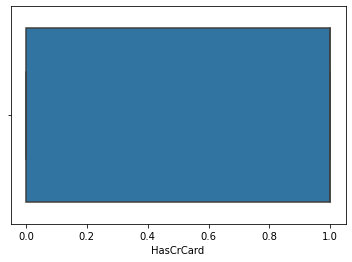

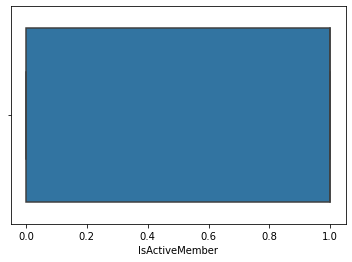

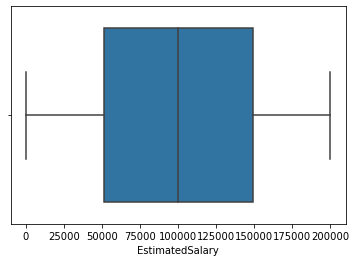

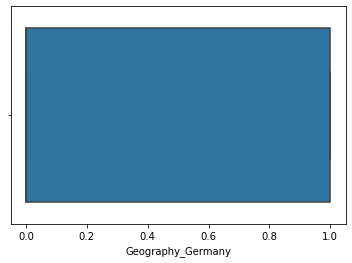

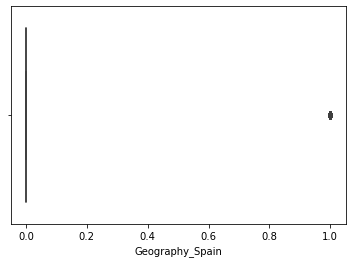

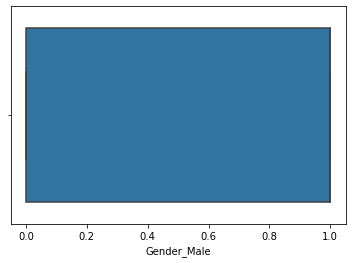

In [17]:
#outliers
for col in X:
    plt.figure()
    sns.boxplot(X[col])
    plt.show()

boxplot used for checking outlires between them, from above we can see Age column has more outlires.

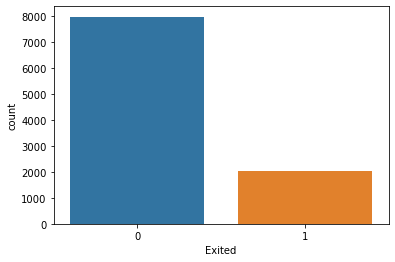

In [18]:
#target count
plt.figure()
sns.countplot(y)
plt.show()

from above we can see target column(Exited) data is highly imbalance.

# Classification

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [20]:
# Splitting the dataset into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [21]:
# Standardizing the Dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

we used standard scaler for scaling on independent features.

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
sm=SMOTE(random_state=42)
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

Data is imbalance so we are doing Oversampling for balancing data.

In [24]:
y_train_sm.value_counts()

0    5547
1    5547
Name: Exited, dtype: int64

we can see both 0 & 1 are same value counts,so our data is balance now.

# Naive Bayes

In [25]:
nb = GaussianNB()
nb.fit(X_train_sm,y_train_sm)

GaussianNB()

In [26]:
# predict on testing

y_pred = nb.predict(X_test)

In [27]:
print("accuracy", accuracy_score(y_test,y_pred))
print("precision", precision_score(y_test,y_pred))
print("recall", recall_score(y_test,y_pred))
print("f1", f1_score(y_test,y_pred))

accuracy 0.7273333333333334
precision 0.38857142857142857
recall 0.6986301369863014
f1 0.4993880048959609


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2416
           1       0.39      0.70      0.50       584

    accuracy                           0.73      3000
   macro avg       0.65      0.72      0.66      3000
weighted avg       0.81      0.73      0.75      3000



Using Naive Bayes algorithm we get 73% accuracy & 70% recall value ,so from this algorithm we get good results for accuracy & recall.

## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
knn.fit(X_train_sm,y_train_sm)

KNeighborsClassifier(n_neighbors=1)

In [32]:
y_pred = knn.predict(X_test)

In [33]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[2022  394]
 [ 285  299]]
0.7736666666666666


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      2416
           1       0.43      0.51      0.47       584

    accuracy                           0.77      3000
   macro avg       0.65      0.67      0.66      3000
weighted avg       0.79      0.77      0.78      3000



Using KNN algorithm we get 77% accuracy & 51% recall value for K=1.As compared to Naive bayes KNN algorithm results is decreased for both accuracy & recall.

## Choosing the K value

In [35]:
error_rate = []

# Will take some time
for i in range(1,70):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sm,y_train_sm)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

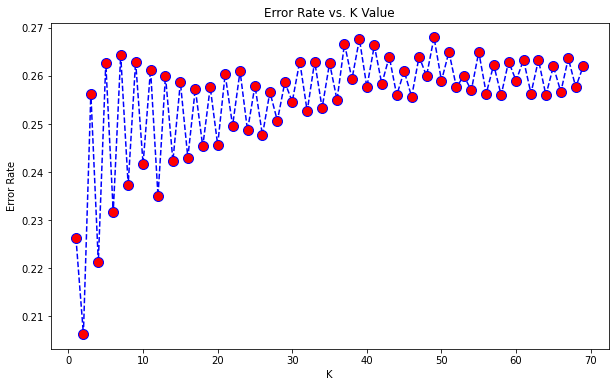

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

from above graph we can see there is so much fluctuation between error rate & K value. 

In [37]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_sm,y_train_sm)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

WITH K=5


[[1845  571]
 [ 217  367]]


              precision    recall  f1-score   support

           0       0.89      0.76      0.82      2416
           1       0.39      0.63      0.48       584

    accuracy                           0.74      3000
   macro avg       0.64      0.70      0.65      3000
weighted avg       0.80      0.74      0.76      3000

0.7373333333333333


Choosing K=5 for KNN algorithm we get good result as compared to previous KNN result, we get 74% accuracy & 63% recall value.

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
# model
lr = LogisticRegression(random_state=1)
lr.fit(X_train_sm,y_train_sm)

LogisticRegression(random_state=1)

In [40]:
# train score
lr.score(X_train_sm, y_train_sm)

0.7152514872904273

In [41]:
# prediction on test
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2416
           1       0.37      0.70      0.48       584

    accuracy                           0.71      3000
   macro avg       0.64      0.71      0.64      3000
weighted avg       0.80      0.71      0.74      3000



From logistic regression algorithm we get 71% accuracy & 70% recall value , same score as Naive bayes & KNN algorithm. 


# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler

In [43]:
# model
# gini index
dt = DecisionTreeClassifier()
dt.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier()

In [44]:
# train score
dt.score(X_train,y_train)

1.0

In [45]:
# predict
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2416
           1       0.43      0.54      0.48       584

    accuracy                           0.77      3000
   macro avg       0.66      0.68      0.67      3000
weighted avg       0.79      0.77      0.78      3000



From Decision Tree algorithm we can see both recall & precision score is decreased as compared to previous algorithms.

In [46]:
# depth
dt.get_depth()

23

In [47]:
# prunning
# max depth

dt2 = DecisionTreeClassifier(max_depth=8)
dt2.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=8)

In [48]:
# predict
y_pred = dt2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2416
           1       0.51      0.65      0.57       584

    accuracy                           0.81      3000
   macro avg       0.71      0.75      0.72      3000
weighted avg       0.83      0.81      0.82      3000



Using pruning technique max_depth we get better score,both recall & accuracy is increased.Accuracy is 81% & recall is 65% for 1.

In [49]:
#Random over sampling
rs = RandomOverSampler(random_state=1)
X_train_rs, y_train_rs = rs.fit_resample(X_train,y_train)

In [50]:
y_train_rs.value_counts()

0    5547
1    5547
Name: Exited, dtype: int64

In [51]:
dt3 = DecisionTreeClassifier()
dt3.fit(X_train_rs, y_train_rs)

DecisionTreeClassifier()

In [52]:
y_pred = dt3.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2416
           1       0.49      0.49      0.49       584

    accuracy                           0.80      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.80      0.80      0.80      3000



Using Random over sampling we can see that recall value is 49% & accuracy is 80% for 1. accuracy score is good but recall value is decreased.

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_estimators=75, max_depth=18, max_features=8)
rf.fit(X_train_rs, y_train_rs)

RandomForestClassifier(max_depth=18, max_features=8, n_estimators=75)

In [55]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2416
           1       0.61      0.54      0.57       584

    accuracy                           0.84      3000
   macro avg       0.75      0.73      0.74      3000
weighted avg       0.84      0.84      0.84      3000



from Random forest classifier we get 56% recall & 85% accuracy for 1.

# Boosting

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
#adaboost
ab = AdaBoostClassifier(n_estimators=100, random_state=1)
ab.fit(X_train_sm,y_train_sm)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [58]:
# prediction
y_pred = ab.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      2416
           1       0.54      0.66      0.59       584

    accuracy                           0.82      3000
   macro avg       0.72      0.76      0.74      3000
weighted avg       0.84      0.82      0.83      3000



Using Adaboost classifier we get 66% recall score & 82% accuracy score for 1 as compared to random forest classifier this score is good.

In [59]:
#gradient boosting
gb = GradientBoostingClassifier(random_state=1, n_estimators=150, learning_rate=0.2)
gb.fit(X_train_sm,y_train_sm)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=150, random_state=1)

In [60]:
#prediction
y_pred = gb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2416
           1       0.68      0.58      0.63       584

    accuracy                           0.87      3000
   macro avg       0.79      0.76      0.77      3000
weighted avg       0.86      0.87      0.86      3000



Using Gradientboost classifier we get 58% recall score & 87% accuracy score for 1 as compared to adaboost classifier.Accuracy is increased but recall is decreased.

In [61]:
#XG boosting
xgb = XGBClassifier(n_estimators=200,random_state=1)
xgb.fit(X_train_sm,y_train_sm)

[09:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2416
           1       0.67      0.55      0.60       584

    accuracy                           0.86      3000
   macro avg       0.78      0.74      0.76      3000
weighted avg       0.85      0.86      0.85      3000



Using XGradientboost classifier we get 55% recall score & 86% accuracy score for 1 as compared to adaboost classifier & gradient boosting classifier.Accuracy & recall almost same.

# Hyper parameter tuning using GridSearchCV

In [63]:
param_grid = {"n_estimators":[75,100,125,150],
              "learning_rate":[0.1,0.2,0.3],
              "min_samples_leaf":[10,20],
              "max_depth":[2,3,4]}

In [64]:
# model
gbc = GradientBoostingClassifier(random_state=1)

In [65]:
# grid search
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(gbc, param_grid, cv=2)

In [66]:
gs.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [10, 20],
                         'n_estimators': [75, 100, 125, 150]})

In [67]:
gs.best_params_

{'learning_rate': 0.2,
 'max_depth': 2,
 'min_samples_leaf': 20,
 'n_estimators': 150}

In [68]:
final_model = GradientBoostingClassifier(random_state=1,learning_rate=0.2,min_samples_leaf=10,n_estimators=150)
final_model.fit(X_train_sm,y_train_sm)

GradientBoostingClassifier(learning_rate=0.2, min_samples_leaf=10,
                           n_estimators=150, random_state=1)

In [69]:
y_pred = final_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2416
           1       0.67      0.58      0.62       584

    accuracy                           0.86      3000
   macro avg       0.79      0.75      0.77      3000
weighted avg       0.86      0.86      0.86      3000



Applying Hyperparamater tuning we get good accuracy that is 86% but recall score is slightly decreased that is 58%.

# Support Vector Machine

In [70]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [71]:
#linear svc
lin_svc = LinearSVC(random_state=1)
lin_svc.fit(X_train_sm,y_train_sm)

LinearSVC(random_state=1)

In [72]:
y_pred = lin_svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      2416
           1       0.37      0.70      0.48       584

    accuracy                           0.71      3000
   macro avg       0.64      0.71      0.64      3000
weighted avg       0.80      0.71      0.74      3000



In [73]:
#soft margin
lin_svc_soft = LinearSVC(random_state=1, C=1)
lin_svc_soft.fit(X_train_sm,y_train_sm)

LinearSVC(C=1, random_state=1)

In [74]:
y_pred = lin_svc_soft.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      2416
           1       0.37      0.70      0.48       584

    accuracy                           0.71      3000
   macro avg       0.64      0.71      0.64      3000
weighted avg       0.80      0.71      0.74      3000



In [75]:
#svc polynomial
svc = SVC(kernel="poly", degree=1, random_state=1, C=0.8)
svc.fit(X_train_sm,y_train_sm)

SVC(C=0.8, degree=1, kernel='poly', random_state=1)

In [76]:
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2416
           1       0.37      0.71      0.49       584

    accuracy                           0.71      3000
   macro avg       0.64      0.71      0.64      3000
weighted avg       0.81      0.71      0.74      3000



In [77]:
#svc radial basis
svc = SVC(kernel="rbf",random_state=1,C=0.5)
svc.fit(X_train_sm,y_train_sm)

SVC(C=0.5, random_state=1)

In [78]:
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      2416
           1       0.46      0.72      0.56       584

    accuracy                           0.78      3000
   macro avg       0.69      0.76      0.71      3000
weighted avg       0.83      0.78      0.80      3000



Applying SVC we get 71% accuracy for linear_svc,soft margin & polynomial svc & their recall score is 70%,70%,71%.
For svc radial we get 78% accuracy & 72% recall score.so accuracy & recall is increased as compared to linear svc & polynomial svc.